<p>Nama : Ilham Padli</p>
<p>NIM : 09011181823125</p>

<b><h1>Data Visualization</h1></b>
<p>Data yang digunakan adalah data penyebab Gagal Jantung</p>
<p>Datasets Source : https://www.kaggle.com/andrewmvd/heart-failure-clinical-data </p>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Datasets.csv')
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Text(0, 0.5, 'Kadar Creatine Phosphokinase')

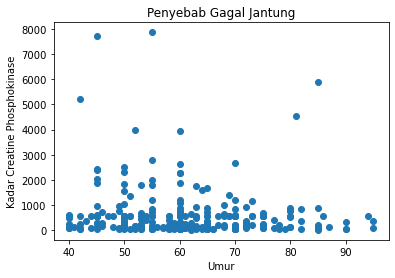

In [8]:
fig, ax = plt.subplots()

ax.scatter(data['age'], data['creatinine_phosphokinase'])
ax.set_title('Penyebab Gagal Jantung')
ax.set_xlabel('Umur')
ax.set_ylabel('Kadar Creatine Phosphokinase')


Text(0, 0.5, 'Kadar Serum Creatinine')

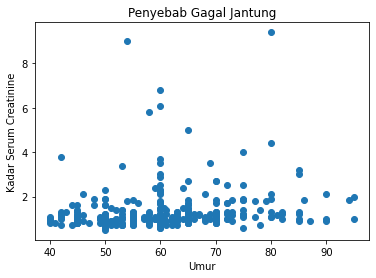

In [9]:
fig, ax = plt.subplots()

ax.scatter(data['age'], data['serum_creatinine'])
ax.set_title('Penyebab Gagal Jantung')
ax.set_xlabel('Umur')
ax.set_ylabel('Kadar Serum Creatinine')

Text(0, 0.5, 'Kadar Creatine Phosphokinase')

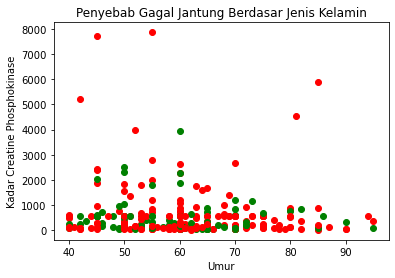

In [15]:
colors = {1:'r', 0:'g'}
fig, ax = plt.subplots()
for i in range(len(data['age'])):
    ax.scatter(data['age'][i], data['creatinine_phosphokinase'][i],color=colors[data['sex'][i]])
ax.set_title('Penyebab Gagal Jantung Berdasar Jenis Kelamin')
ax.set_xlabel('Umur')
ax.set_ylabel('Kadar Creatine Phosphokinase')

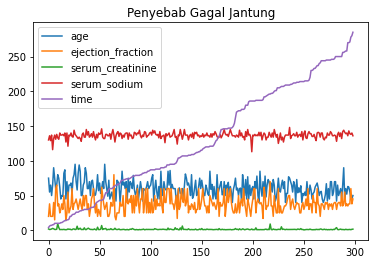

In [17]:
columns = data.columns.drop(['anaemia', 'diabetes', 'creatinine_phosphokinase', 'high_blood_pressure', 'platelets', 'smoking', 'sex', 'DEATH_EVENT'])
x_data = range(0, data.shape[0])
fig, ax = plt.subplots()
for column in columns:
    ax.plot(x_data, data[column], label=column)
ax.set_title('Penyebab Gagal Jantung')
ax.legend()

Text(0, 0.5, 'Jumlah Penderita')

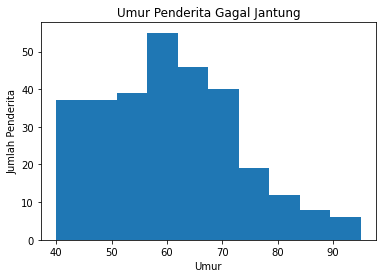

In [19]:
fig, ax = plt.subplots()
ax.hist(data['age'])
ax.set_title('Umur Penderita Gagal Jantung')
ax.set_xlabel('Umur')
ax.set_ylabel('Jumlah Penderita')

Text(0, 0.5, 'Jumlah Penderita')

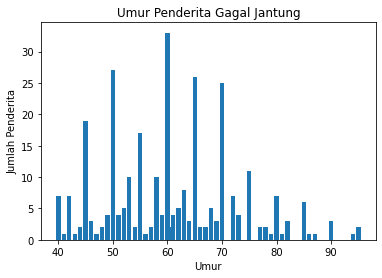

In [21]:
fig, ax = plt.subplots() 
data_temp = data['age'].value_counts() 
points = data_temp.index 
frequency = data_temp.values 
ax.bar(points, frequency) 
ax.set_title('Umur Penderita Gagal Jantung')
ax.set_xlabel('Umur')
ax.set_ylabel('Jumlah Penderita')


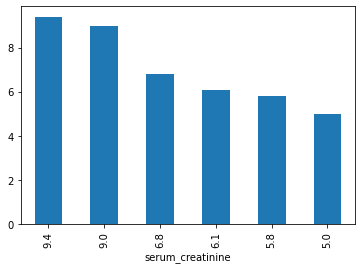

In [30]:
data.groupby("serum_creatinine").serum_creatinine.mean().sort_values(ascending=False)[:5].plot.bar()

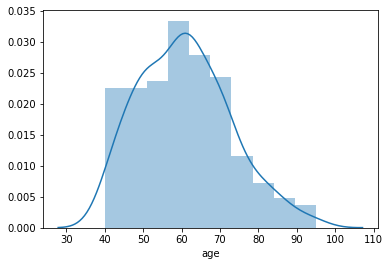

In [32]:
sns.distplot(data['age'], bins=10, kde=True)

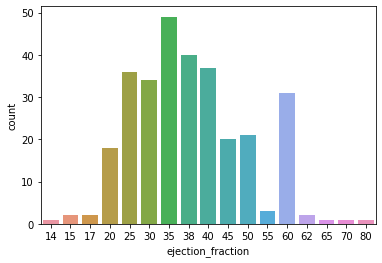

In [36]:
sns.countplot(data['ejection_fraction'])

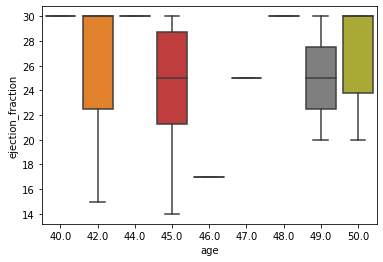

In [46]:
df = data[(data['age']<=50) & (data['ejection_fraction']<=30)]
sns.boxplot('age', 'ejection_fraction', data=df)

<b><h1>Linier Regression</h1></b>

Load data dari file Datasets.csv dengan hanya mengambil kolom age dan ejection_fraction

In [54]:
lr_data = pd.read_csv('Datasets.csv', usecols=['age', 'ejection_fraction'])
lr_data.head(5)

,age,ejection_fraction
0,75.0,20
1,55.0,38
2,65.0,20
3,50.0,20
4,65.0,20


Melihat jumlah kolom dan baris data. Dalam data ini terdapat 2 Kolom dan 299 Baris data.

In [55]:
lr_data.shape

(299, 2)

Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.

In [56]:
lr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                299 non-null    float64
 1   ejection_fraction  299 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.

In [57]:
lr_data.describe()

,age,ejection_fraction
count,299.000000,299.000000
mean,60.833893,38.083612
std,11.894809,11.834841
min,40.000000,14.000000
25%,51.000000,30.000000
50%,60.000000,38.000000
75%,70.000000,45.000000
max,95.000000,80.000000


Mencari dan menangani missing values.Namun data yang dipakai tidak terdapat missing values / null.

In [58]:
lr_data.isnull().sum()

age                  0
ejection_fraction    0
dtype: int64

<p>Melakukan Exploratory Data Analysis (EDA) untuk lebih mengenal data kita dan menemukan insights dari data.
Univariate analysis age. Melihat distribusi dari age. </p>
<ul>
    <li>Dapat dilihat bahwa mean dan median dari horsepower terpusat di sekitar nilai > 48.</li>
    <li>Distribusinya hampir mirip dengan distribusi normal namun persebaran data kurang merata (memiliki standard deviasi yang tinggi) karena memiliki whiskers boxplot yang panjang.</li>
    <li>Tidak terdapat outliers data yang bisa dilihat di boxplot./li>
</ul>

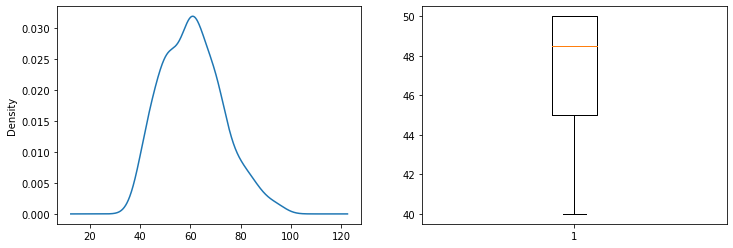

In [59]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
lr_data['age'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['age'])
plt.show()

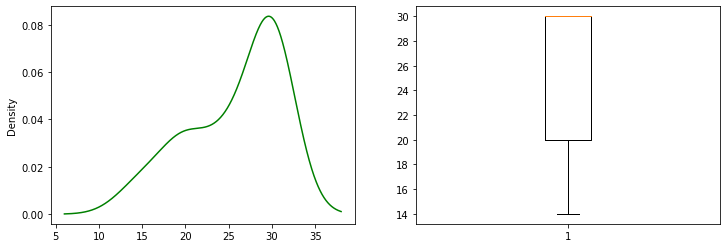

In [60]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['ejection_fraction'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(df['ejection_fraction'])
plt.show()

Mengetahui nilai korelasi dari age dan ejection_fraction. Nilai korelasinya adalah 0.06.

In [61]:
lr_data.corr()

,age,ejection_fraction
age,1.000000,0.060098
ejection_fraction,0.060098,1.000000


<p>Setelah kita mengetahui karakteristik dari data kita, maka tahapan selanjutnya adalah Modelling.</p>
<p>Membuat variabel X dan Y </p>

In [62]:
x = df['age'].values.reshape(-1,1)
y = df['ejection_fraction'].values.reshape(-1,1)

Kedua, kita split data kita menjadi training and testing dengan porsi 80:20.

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Ketiga, kita buat object linear regresi.

In [64]:
lin_reg = LinearRegression()

Keempat, training model menggunakan training data yang sudah displit sebelumnya.

In [65]:
lin_reg.fit(x_train, y_train)

LinearRegression()

Kelima, cari tau nilai slope/koefisien (m) dan intercept (b).

In [66]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.19222788]]
[17.63837012]


Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit sebelumnya. Model kita mendapatkan accuracy score sebesar 78.61%

In [67]:
lin_reg.score(x_test, y_test)

-0.7861380280272932

Ketujuh, visualisasi Regression Line menggunakan data testing.

Text(0.5, 1.0, 'Plot Age vs Ejection Fraction')

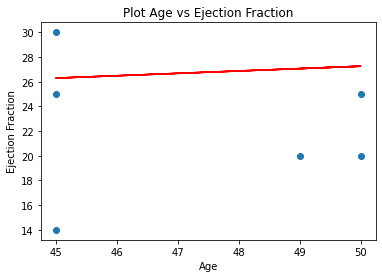

In [68]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.title('Plot Age vs Ejection Fraction')

Setelah kita yakin dengan model yang dibuat, selanjutnya adalah prediksi dari umur pasien dengan umur 20, 30, 40 dan 50.

In [72]:
lin_reg.predict([[20]])

array([[21.48292775]])

In [73]:
lin_reg.predict([[30]])

array([[23.40520656]])

In [74]:
lin_reg.predict([[40]])

array([[25.32748538]])

In [75]:
lin_reg.predict([[50]])

array([[27.2497642]])